In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import os.path
import ast

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 10) 
# pd.set_option('display.max_rows', 1000)

## Introduction


This notebook uses data that describes vaiour features of Python source code to evaluate whether machine learning models can predict the status of mutations without the full length process of generating and executing the testing suit on every mutation.


|	Features Number	|	Abbreviation	|	Description	|
|-------------------|-------------------|---------------|
|	0	|	source_file	|	Source file where mutations occur.	|
|	1	|	mutation_number	|	Mutation identified.	|
|	2	|	mutant_operator_type	|	Type of mutation operator.	|
|	3	|	lineno	|	Line number where mutation occurs.	|
|	4	|	ast_depth	|	Current depth in the AST of the mutation.	|
|	5	|	num_test_cover	|	Number of assert tests that cover the mutation.	|
|	6	|	num_executed	|	Number of times the mutated statement was executed in all tests.	|
|	7	|	num_assert_tm	|	Number of asserts in all test methods that cover the mutation.	|
|	8	|	num_assert_tc	|	Number of asserts in all test cases that cover the mutation.	|
|	9	|	function_max_depth	|	The maximum depth of a test function that covers the mutation.	|
|	10	|	function_avg_depth	|	The average depth test functions that cover the mutation.	|
|	11	|	class_max_depth	|	The maximum depth of a class function that covers the mutation.	|
|	12	|	lineno_loc	|	The cumulative lines of code in test functions that cover the mutation.	|
|	13	|	loc_list	|	A location list used for further evaluation. 	|
|	14	|	status	|	Describes whether the mutation status from MutPy testing.	|


Other features are generated in this notebook such as one-hot encoding for mutant operator types.

## Data Exploration

In [3]:
data_file = 'CSV/bitstring_data.csv'

if not os.path.exists(data_file):
    print('Cannot find data')

data2_file = 'CSV/dictset_data.csv'

if not os.path.exists(data2_file):
    print('Cannot find data')

In [4]:
bs_df = pd.read_csv('bitstring_data.csv', sep=',', header=0)
ds_df = pd.read_csv('dictset_data.csv', sep=',', header=0)

frames = [bs_df, ds_df]

bs_df = pd.concat(frames)

In [5]:
bs_df.head()

,source_file,mutation_number,mutant_operator_type,lineno,ast_depth,num_test_cover,num_executed,num_assert_tm,num_assert_tc,function_max_depth,function_avg_depth,class_max_depth,lineno_loc,loc_list,status
0,bitstring.py,1,AOD,216,8,24,57,97,1094,7,6.333333,11,233,"['103:109', '53:56', '224:234', '191:202', '16...",killed
1,bitstring.py,2,AOD,218,7,24,57,97,1094,7,6.333333,11,233,"['103:109', '53:56', '224:234', '191:202', '16...",killed
2,bitstring.py,3,AOD,464,8,0,0,0,0,0,0.000000,0,0,[],survived
3,bitstring.py,4,AOD,467,9,1,256,0,0,0,0.000000,0,0,[],killed
4,bitstring.py,5,AOD,533,10,6,127,51,610,8,7.333333,11,64,"['3080:3091', '2483:2489', '2439:2459', '2461:...",killed


In [6]:
bs_df.tail()

,source_file,mutation_number,mutant_operator_type,lineno,ast_depth,num_test_cover,num_executed,num_assert_tm,num_assert_tc,function_max_depth,function_avg_depth,class_max_depth,lineno_loc,loc_list,status
306,dictset.py,307,SCI,561,2,0,0,0,0,0,0.0,0,0,[],incompetent
307,dictset.py,308,SCI,576,2,0,0,0,0,0,0.0,0,0,[],incompetent
308,dictset.py,309,SCI,593,2,0,0,0,0,0,0.0,0,0,[],survived
309,dictset.py,310,SCI,635,2,0,0,0,0,0,0.0,0,0,[],survived
310,dictset.py,311,SCI,697,2,0,0,0,0,0,0.0,0,0,[],incompetent


In [7]:
bs_df.describe()

,mutation_number,lineno,ast_depth,num_test_cover,num_executed,num_assert_tm,num_assert_tc,function_max_depth,function_avg_depth,class_max_depth,lineno_loc
count,4210.000000,4210.000000,4210.000000,4210.000000,4.210000e+03,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,1817.474109,1679.898575,5.988124,33.625891,3.012760e+03,140.263658,535.920190,6.939430,5.654377,8.369359,264.846081
std,1180.838915,1155.124087,2.276002,74.796929,6.768255e+04,286.384633,495.280262,3.509399,2.719214,4.124305,527.435386
min,1.000000,7.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,742.250000,576.250000,4.000000,1.000000,2.000000e+00,4.000000,18.000000,7.000000,6.250000,7.000000,8.000000
50%,1794.500000,1524.000000,6.000000,7.000000,2.100000e+01,34.000000,508.000000,8.000000,6.786348,11.000000,64.000000
75%,2846.750000,2530.750000,7.000000,25.000000,1.140000e+02,127.000000,872.000000,9.000000,7.000000,11.000000,246.000000
max,3899.000000,4296.000000,17.000000,477.000000,2.359296e+06,1707.000000,1739.000000,11.000000,11.000000,11.000000,3074.000000


In [8]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 310
Data columns (total 15 columns):
source_file             4210 non-null object
mutation_number         4210 non-null int64
mutant_operator_type    4210 non-null object
lineno                  4210 non-null int64
ast_depth               4210 non-null int64
num_test_cover          4210 non-null int64
num_executed            4210 non-null int64
num_assert_tm           4210 non-null int64
num_assert_tc           4210 non-null int64
function_max_depth      4210 non-null int64
function_avg_depth      4210 non-null float64
class_max_depth         4210 non-null int64
lineno_loc              4210 non-null int64
loc_list                4210 non-null object
status                  4210 non-null object
dtypes: float64(1), int64(10), object(4)
memory usage: 526.2+ KB


## Data Cleaning

In [9]:
bs_df.isnull().values.any()

False

In [10]:
bs_df['status'].value_counts()

killed         2978
survived        963
incompetent     222
timeout          47
Name: status, dtype: int64

In [11]:
bs_df = bs_df[bs_df.status != 'incompetent']
bs_df = bs_df[bs_df.status != 'timeout']
bs_df['status'].value_counts()

killed      2978
survived     963
Name: status, dtype: int64

In [12]:
bs_df['mutant_operator_type'].value_counts()

CRP    1782
AOR     562
ROR     491
COI     470
LOR     139
COD     123
ASR      75
SIR      54
EXS      45
LCR      40
AOD      36
EHD      27
IOD      27
IHD      27
SCI      25
BCR      10
LOD       7
DDL       1
Name: mutant_operator_type, dtype: int64

In [13]:
one_hot= pd.get_dummies(bs_df['mutant_operator_type'])
bs_df = bs_df.drop('mutant_operator_type',axis = 1)
bs_df = bs_df.join(one_hot)
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4395 entries, 0 to 3898
Data columns (total 32 columns):
source_file           4395 non-null object
mutation_number       4395 non-null int64
lineno                4395 non-null int64
ast_depth             4395 non-null int64
num_test_cover        4395 non-null int64
num_executed          4395 non-null int64
num_assert_tm         4395 non-null int64
num_assert_tc         4395 non-null int64
function_max_depth    4395 non-null int64
function_avg_depth    4395 non-null float64
class_max_depth       4395 non-null int64
lineno_loc            4395 non-null int64
loc_list              4395 non-null object
status                4395 non-null object
AOD                   4395 non-null uint8
AOR                   4395 non-null uint8
ASR                   4395 non-null uint8
BCR                   4395 non-null uint8
COD                   4395 non-null uint8
COI                   4395 non-null uint8
CRP                   4395 non-null uint8
DDL   

In [14]:
X_bs = bs_df.drop(labels=['source_file','mutation_number', 'loc_list', 'status'], axis=1)
y_bs = bs_df[['status']]

In [15]:
m = X_bs.shape[0]
n = X_bs.shape[1]
print('m = ', m)
print('n = ', n)

m =  4395
n =  28


In [16]:
y_bs = y_bs.replace({'killed':0})
y_bs = y_bs.replace({'survived':1})

In [17]:
X_bs = X_bs.astype(float)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_bs = scaler.fit_transform(X_bs)
X_bs = pd.DataFrame(X_bs)

In [19]:
X_bs.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.179310,0.818269,-0.134425,-0.044033,-0.152830,1.133145,0.004473,0.229836,0.642785,-0.063840,...,-0.0815,-0.108353,-0.078621,-0.089596,-0.095838,-0.039941,-0.188626,-0.369911,-0.082903,-0.111533
1,-1.179310,0.818269,-0.134425,-0.044033,-0.152830,1.133145,0.004473,0.229836,0.642785,-0.063840,...,-0.0815,-0.108353,-0.078621,-0.089596,-0.095838,-0.039941,-0.188626,-0.369911,-0.082903,-0.111533
2,-1.308624,1.249531,-0.442354,-0.045675,-0.485255,-1.015271,0.871708,1.591313,0.396637,-0.497965,...,-0.0815,-0.108353,-0.078621,-0.089596,-0.095838,-0.039941,-0.188626,-0.369911,-0.082903,-0.111533
3,-1.308624,1.249531,-0.442354,-0.045675,-0.485255,-1.015271,0.871708,1.591313,0.396637,-0.497965,...,-0.0815,-0.108353,-0.078621,-0.089596,-0.095838,-0.039941,-0.188626,-0.369911,-0.082903,-0.111533
4,-1.177586,0.387007,-0.134425,-0.044033,-0.152830,1.133145,0.004473,0.229836,0.642785,-0.063840,...,-0.0815,-0.108353,-0.078621,-0.089596,-0.095838,-0.039941,-0.188626,-0.369911,-0.082903,-0.111533


In [20]:
X_bs.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,...,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03
mean,-9.397110e-18,-1.216623e-15,8.419507e-17,-2.497212e-16,1.317641e-15,3.284947e-16,-9.829579e-16,-1.070866e-15,-3.310208e-16,-6.179863e-16,...,9.479461e-16,4.518254e-16,-8.141636e-17,1.303502e-15,-5.589891e-15,-2.224898e-16,1.948119e-15,1.420669e-14,5.879193e-16,4.526780e-15
std,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,...,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00
min,-1.359487e+00,-1.769302e+00,-4.557426e-01,-4.570444e-02,-4.922532e-01,-1.059362e+00,-2.019076e+00,-2.121806e+00,-2.064841e+00,-5.055478e-01,...,-8.149991e-02,-1.083528e-01,-7.862136e-02,-8.959644e-02,-9.583760e-02,-3.994070e-02,-1.886257e-01,-3.699107e-01,-8.290267e-02,-1.115326e-01
25%,-9.224069e-01,-4.755164e-01,-4.423543e-01,-4.564578e-02,-4.782564e-01,-1.025291e+00,4.472658e-03,2.143648e-01,-3.418066e-01,-4.903819e-01,...,-8.149991e-02,-1.083528e-01,-7.862136e-02,-8.959644e-02,-9.583760e-02,-3.994070e-02,-1.886257e-01,-3.699107e-01,-8.290267e-02,-1.115326e-01
50%,-1.534211e-01,-4.425462e-02,-3.620249e-01,-4.508851e-02,-3.767793e-01,-1.414749e-01,2.935511e-01,4.031149e-01,6.427846e-01,-3.842204e-01,...,-8.149991e-02,-1.083528e-01,-7.862136e-02,-8.959644e-02,-9.583760e-02,-3.994070e-02,-1.886257e-01,-3.699107e-01,-8.290267e-02,-1.115326e-01
75%,6.914287e-01,3.870072e-01,-1.076482e-01,-4.233149e-02,-3.735595e-02,6.882305e-01,5.826295e-01,4.773773e-01,6.427846e-01,-2.592528e-02,...,-8.149991e-02,-1.083528e-01,-7.862136e-02,-8.959644e-02,-9.583760e-02,-3.994070e-02,-1.886257e-01,-3.699107e-01,-8.290267e-02,-1.115326e-01
max,2.338024e+00,4.699625e+00,5.930450e+00,6.146370e+01,5.480898e+00,2.425802e+00,1.160786e+00,1.962625e+00,6.427846e-01,5.321960e+00,...,1.226995e+01,9.229110e+00,1.271919e+01,1.116116e+01,1.043432e+01,2.503712e+01,5.301505e+00,2.703355e+00,1.206234e+01,8.965985e+00


## Data Visualization

### Outliers and Boxplots

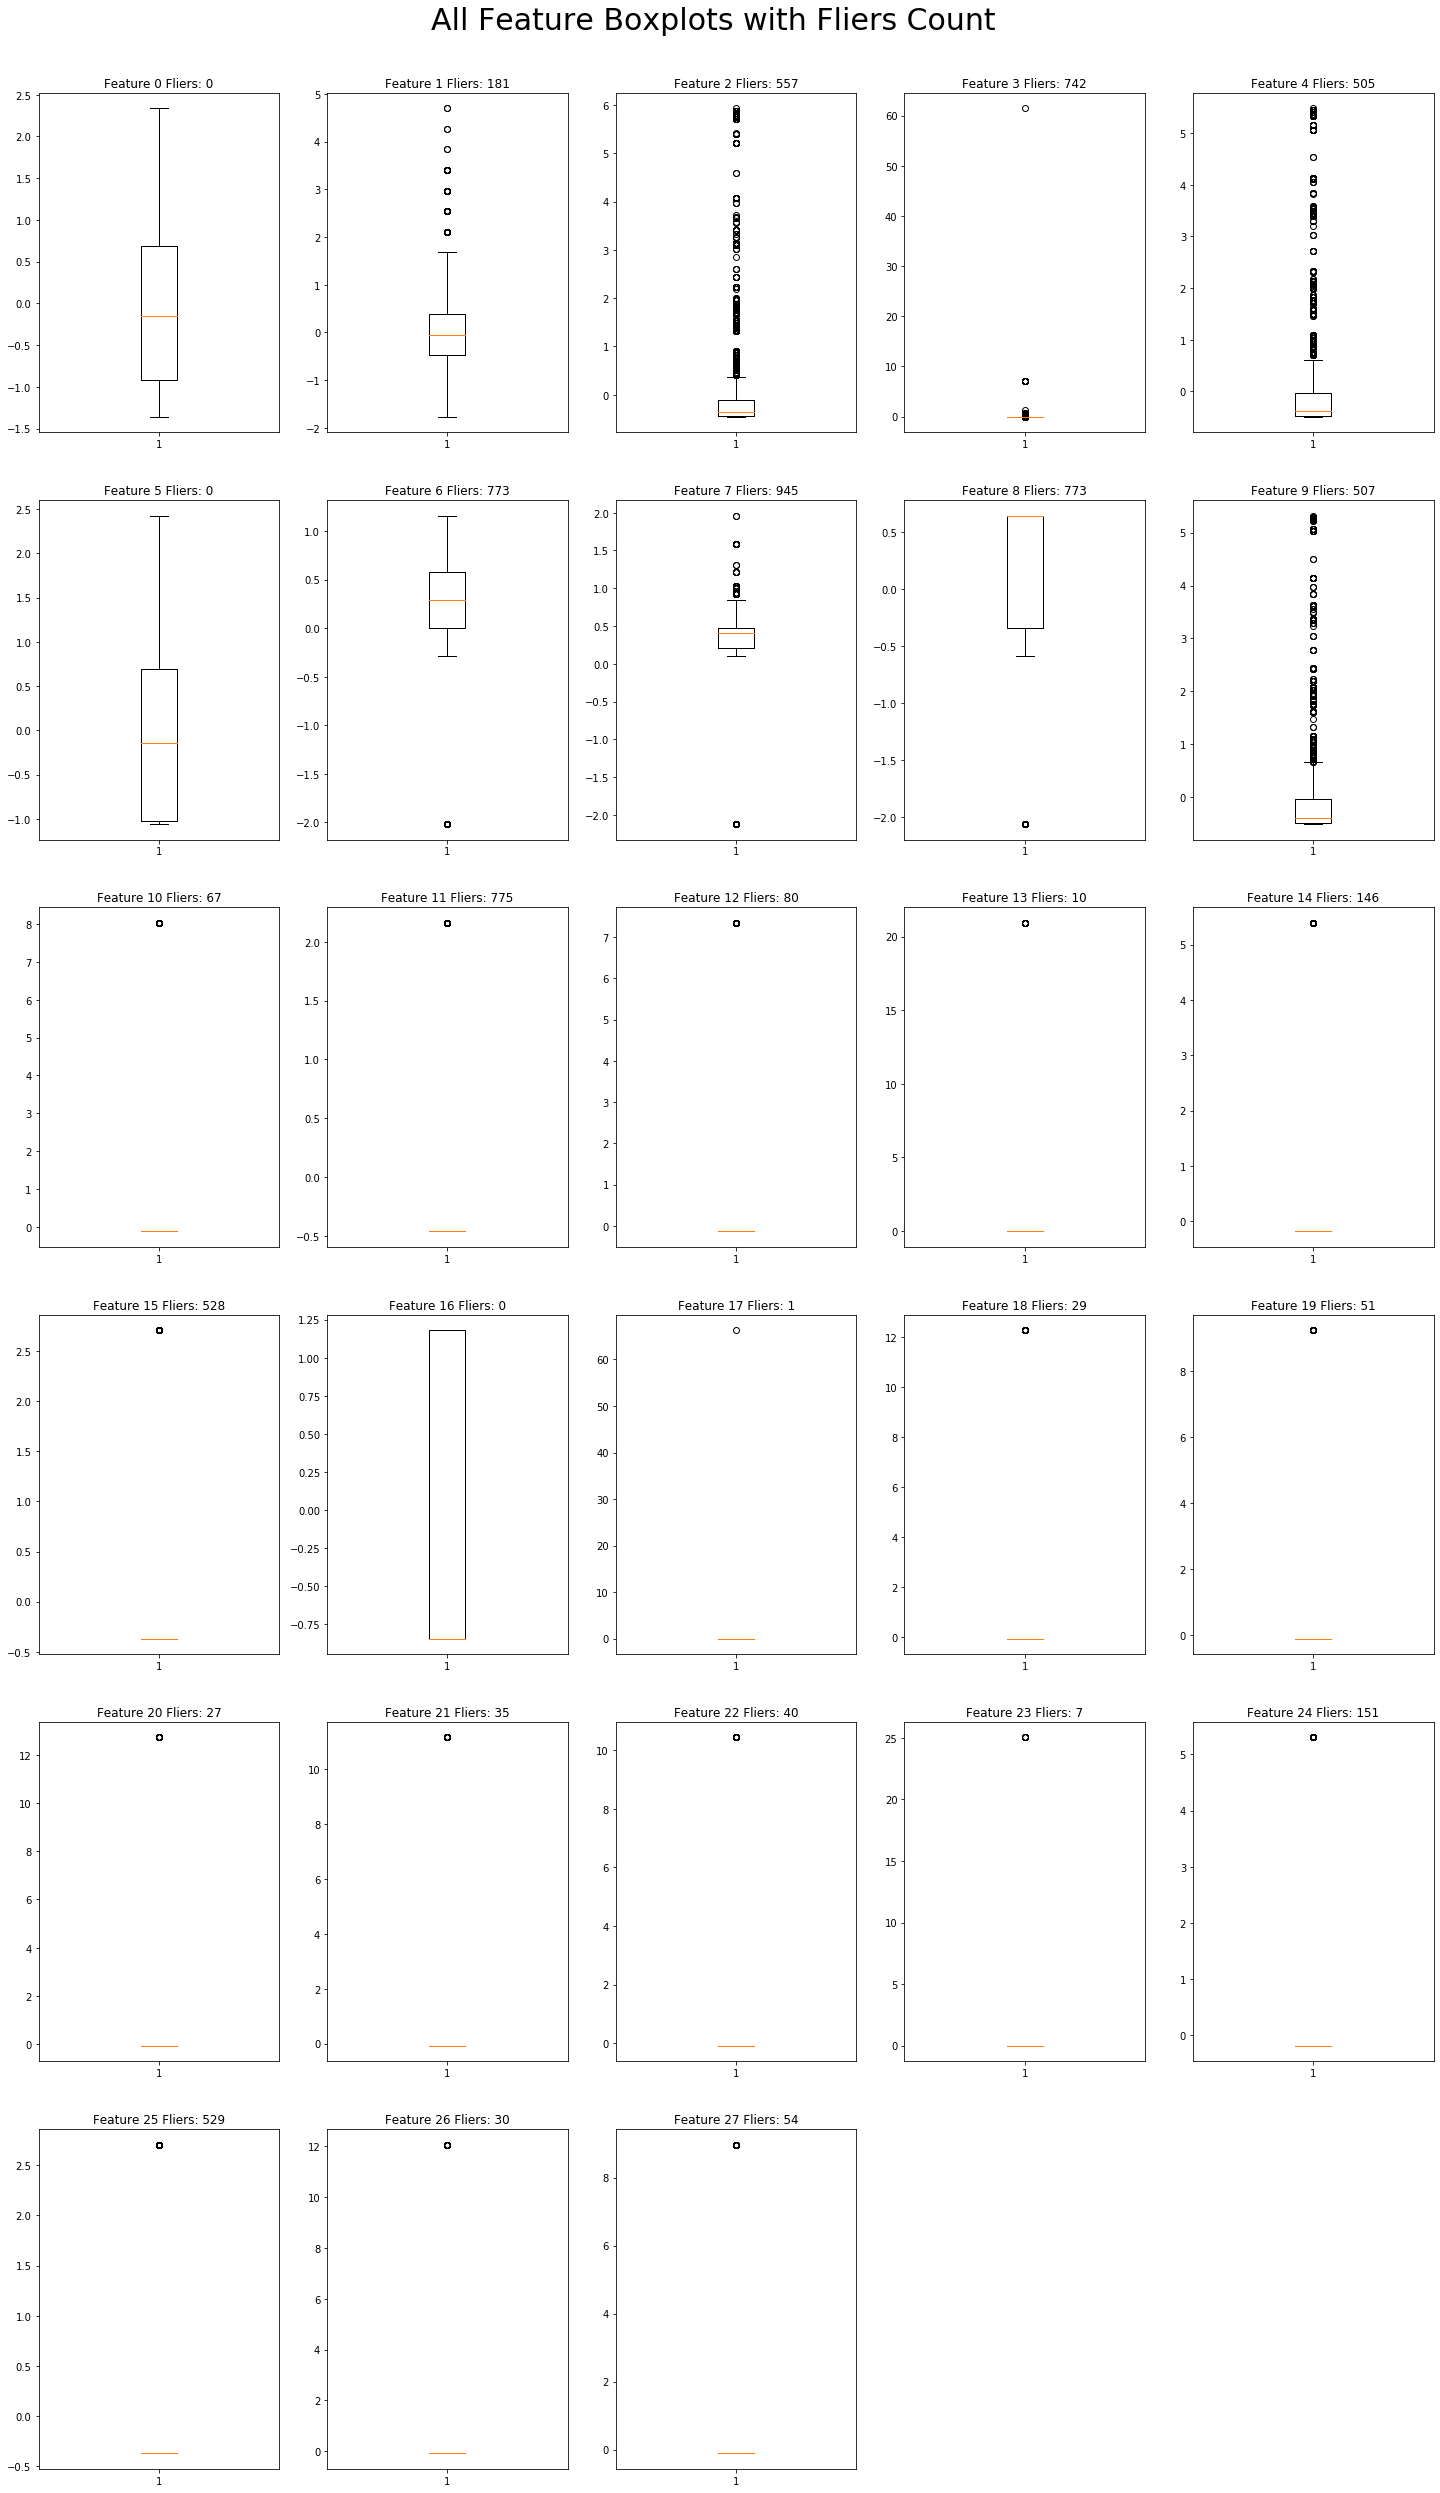

In [21]:
fig = plt.figure(figsize = (25, 40))
unique_fliers = []

col = 5
row = np.ceil(X_bs.shape[1]/col).astype(int)


for r in range(X_bs.shape[1]):
    plt.subplot(row,col,r+1)
    dict_boxPlot = plt.boxplot(X_bs[r])
    _,fliers = dict_boxPlot['fliers'][0].get_data()
    plt.title('Feature {} Fliers: {}'.format(r, fliers.size))

    lower_cap = dict_boxPlot['caps'][0].get_ydata()[0] 
    upper_cap = dict_boxPlot['caps'][1].get_ydata()[0] 

    idx_tuple = np.where((X_bs[r] > upper_cap) | (X_bs[r] < lower_cap))
    idx_fliers = idx_tuple[0]

    for q in idx_fliers:    
        unique_fliers.append(q)

fig.subplots_adjust(top=0.95)
fig.suptitle("All Feature Boxplots with Fliers Count",fontsize=30)
plt.show()


In [22]:
unique_fliers,y_counts = np.unique(unique_fliers, return_counts=True)
print(unique_fliers.size)
print(y_counts.max()) # One instance has an outlier in this many features

3521
6


### Correlation and Dependencies

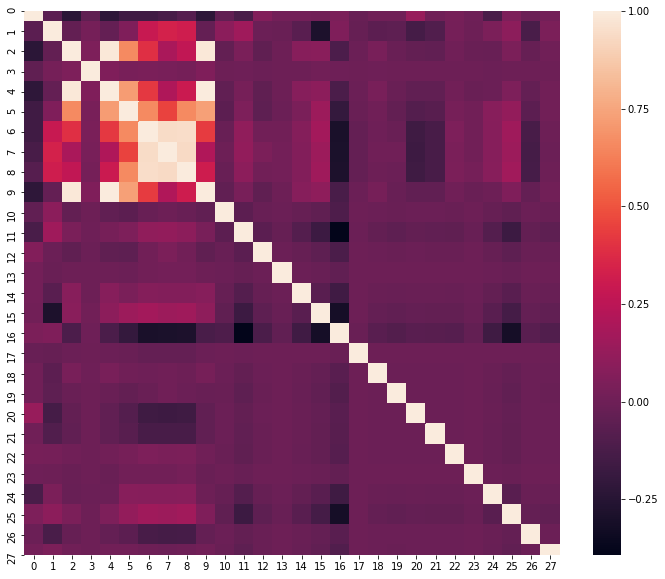

In [23]:
X_corr = X_bs.corr()
sns.heatmap(X_corr)

In [24]:
threshold = 0.7
print("Correlations greater than {}\n".format(threshold))
print("Feature\tFeature\tCorrelation")
corr_col_index = []
for i in range(X_corr.shape[0]):
    for j in range(i+1, X_corr.shape[0]):
        if X_corr[i][j] >= threshold:
            print("{}\t{}\t{}\t".format(i, j, X_corr[i][j]))
            corr_col_index.append([i,j])

Correlations greater than 0.7

Feature	Feature	Correlation
2	4	0.9881320194626477	
2	9	0.9872642550600584	
4	5	0.7217145189354915	
4	9	0.9981558834992316	
5	9	0.72894927337739	
6	7	0.9442098219112571	
6	8	0.9464710007909286	
7	8	0.9387854076044684	


### Examining PCA Components

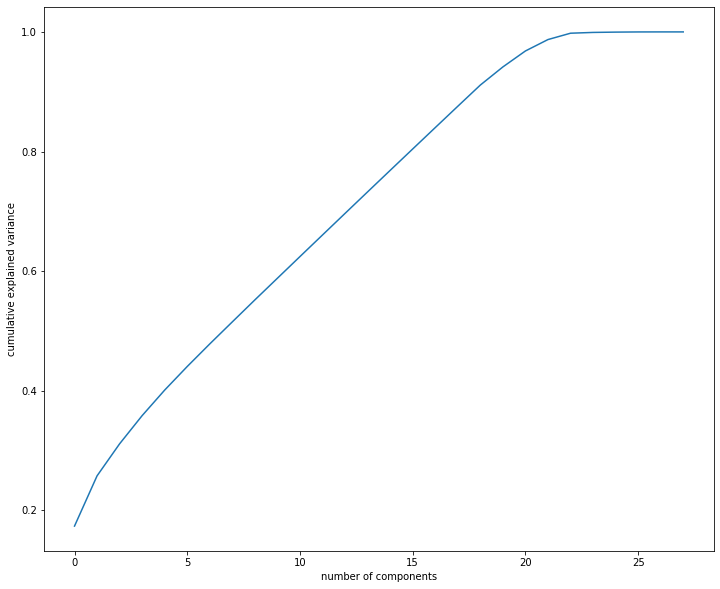

In [25]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_bs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [26]:
ratio = pca.explained_variance_ratio_

print("\tPCA Component Variance Ratios\nFeatures: \t Ratio")
for i in range(5,26,5):
    print(" {} \t {}".format(i, np.sum(ratio[0:i])))

	PCA Component Variance Ratios
Features: 	 Ratio
 5 	 0.40130540910424584
 10 	 0.5882645241886779
 15 	 0.7685093130367745
 20 	 0.941446568388893
 25 	 0.9996519988239039


In [27]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_bs)
projected.shape

(4395, 2)

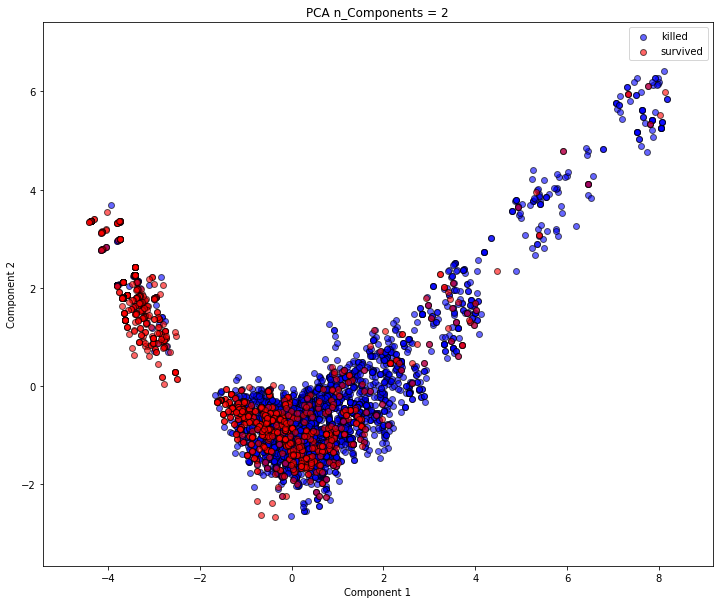

In [28]:
RB_idx = np.where(y_bs == 0)
NRB_idx = np.where(y_bs == 1) 


x_min, x_max = projected[:, 0].min() - 1, projected[:, 0].max() + 1
y_min, y_max = projected[:, 1].min() - 1, projected[:, 1].max() + 1

plt.scatter(projected[RB_idx, 0], projected[RB_idx, 1], c='b', edgecolor='k', alpha=0.6, label='killed')
plt.scatter(projected[NRB_idx, 0], projected[NRB_idx, 1], c='r', edgecolor='k', alpha=0.6, label='survived')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA n_Components = 2')
plt.legend()

## Data Pre-Processing

#### Functions Used to Pre-Process Data

In [29]:
def removeCorrelations(X, threshold):
    """
    Drop Featurs with high correlations at a given threshold.
    
    Args
    ----
    X (PD DataFrame): Data with mxn, where m are instances and n is features
    threshold (float): Threshold to drop features from data.
    
    Returns
    -------
    X_new (PD DataFrame): New data with dropped feature columns.
    """

    X_corr = X.corr().abs()
    traingle = X_corr.where(np.triu(np.ones(X_corr.shape), k=1).astype(np.bool))

    drop_col = [column for column in traingle.columns if any(traingle[column] >= threshold)]   
    X_new = X.drop(columns=drop_col)    
    
    return X_new

In [30]:
def removeOutliers(X, y, threshold):
    """
    Drop Featurs with high correlations at a given threshold.
    
    Args
    ----
    X (PD DataFrame): Data with mxn, where m are instances and n is features
    threshold (float): Threshold to drop instances from data.
    y (PD Series): Classification column to match instance drops.
    
    Returns
    -------
    X_new (PD DataFrame): New data with dropped istances.
    y_new (PD Series): New classification column to math dropped instances.
    """
    
    list_fliers = []
   
    
    for i in X.columns:
        # Create figure to extract caps, but do not display figures
        fig = plt.figure()
        dict_boxPlot = plt.boxplot(X[i])
        plt.close(fig)

        lower_cap = dict_boxPlot['caps'][0].get_ydata()[0] 
        upper_cap = dict_boxPlot['caps'][1].get_ydata()[0] 

        idx_tuple = np.where((X[i] > upper_cap) | (X[i] < lower_cap))
        idx_fliers = idx_tuple[0]

        for q in idx_fliers:    
            list_fliers.append(q)
        i+=1

    unique_fliers,y_counts = np.unique(list_fliers, return_counts=True)

    drop_row_idx = np.where(y_counts >= threshold)
    drop_row = unique_fliers[drop_row_idx]
    
    X_new = X.drop(drop_row)    
    y_new = y.drop(drop_row)
    return X_new, y_new

#### Setting Threshold Parameters

Threshold parameters are set to remove outliers and dropped highly correlated feature columns.

In [31]:
from sklearn.model_selection import train_test_split

X_orginal = X_bs
y_original = y_bs

In [32]:
def resetThresholds(X_orginal,y_original, c_threshold, o_threshold):
    X = X_orginal
    y = y_original
    
    if c_threshold != 0:
        X = removeCorrelations(X, c_threshold)
    if o_threshold != 0:
        X, y = removeOutliers(X, y_original, o_threshold)
    return train_test_split(X, y, test_size=0.25, random_state=42)

## Algorithm Implementation

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#### Voting classifier with a Logistic Regressor, SVM, and a Random Forest

In [34]:
log_clf = LogisticRegression(solver='newton-cg', C=5.0, max_iter=10000)
svm_clf = SVC(gamma='auto',probability=True)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rnd', rnd_clf)],
    voting='hard')

result = {}

for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
    result[clf.__class__.__name__] = []
result['Correlation Threshold'] = []
result['Outlier Threshold'] = []


c_list = [0, 0.9, 0.85, 0.8, 0.75]
o_list = [0, 15, 10, 8]

for c_threshold in c_list:
    for o_threshold in o_list:
        X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,c_threshold,o_threshold)
        result['Correlation Threshold'].append(c_threshold)
        result['Outlier Threshold'].append(o_threshold)


        for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
            clf.fit(X_train, np.ravel(y_train))
            y_pred = clf.predict(X_test)
            result[clf.__class__.__name__].append(accuracy_score(y_test, y_pred))

result_df = pd.DataFrame(result)
display(result_df)

,LogisticRegression,SVC,RandomForestClassifier,VotingClassifier,Correlation Threshold,Outlier Threshold
0,0.806187,0.839854,0.868972,0.845314,0.00,0
1,0.806187,0.839854,0.868972,0.846224,0.00,15
2,0.806187,0.839854,0.868972,0.846224,0.00,10
3,0.806187,0.839854,0.870792,0.844404,0.00,8
4,0.797088,0.838035,0.858963,0.841674,0.90,0
5,0.797088,0.838035,0.858053,0.839854,0.90,15
6,0.797088,0.838035,0.857143,0.839854,0.90,10
7,0.797088,0.838035,0.858053,0.839854,0.90,8
8,0.797088,0.838035,0.858053,0.839854,0.85,0
9,0.797088,0.838035,0.858963,0.840764,0.85,15


In [35]:
result_df.max()

LogisticRegression         0.806187
SVC                        0.839854
RandomForestClassifier     0.870792
VotingClassifier           0.846224
Correlation Threshold      0.900000
Outlier Threshold         15.000000
dtype: float64

The **RandomForestClassifier** classifier performs the best **0.869882** with a correlation threshold of **0** and removing instances with **0** or more outliers. 

Next the voting classifier is changed to a soft voting.

In [36]:
log_clf = LogisticRegression(solver='newton-cg', C=5.0, max_iter=10000)
svm_clf = SVC(gamma='auto',probability=True)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rnd', rnd_clf)],
    voting='soft')

result = {}

for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
    result[clf.__class__.__name__] = []
result['Correlation Threshold'] = []
result['Outlier Threshold'] = []


c_list = [0, 0.9, 0.85, 0.8, 0.75]
o_list = [0, 15, 10, 8]

for c_threshold in c_list:
    for o_threshold in o_list:
        X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,c_threshold,o_threshold)
        result['Correlation Threshold'].append(c_threshold)
        result['Outlier Threshold'].append(o_threshold)


        for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
            clf.fit(X_train, np.ravel(y_train))
            y_pred = clf.predict(X_test)
            result[clf.__class__.__name__].append(accuracy_score(y_test, y_pred))

result_df = pd.DataFrame(result)
display(result_df)

,LogisticRegression,SVC,RandomForestClassifier,VotingClassifier,Correlation Threshold,Outlier Threshold
0,0.806187,0.839854,0.868972,0.851683,0.00,0
1,0.806187,0.839854,0.868972,0.851683,0.00,15
2,0.806187,0.839854,0.868972,0.850773,0.00,10
3,0.806187,0.839854,0.870792,0.850773,0.00,8
4,0.797088,0.838035,0.859873,0.840764,0.90,0
5,0.797088,0.838035,0.856233,0.841674,0.90,15
6,0.797088,0.838035,0.857143,0.840764,0.90,10
7,0.797088,0.838035,0.856233,0.840764,0.90,8
8,0.797088,0.838035,0.857143,0.840764,0.85,0
9,0.797088,0.838035,0.858053,0.840764,0.85,15


In [37]:
result_df.max()

LogisticRegression         0.806187
SVC                        0.839854
RandomForestClassifier     0.870792
VotingClassifier           0.851683
Correlation Threshold      0.900000
Outlier Threshold         15.000000
dtype: float64

The **RandomForestClassifier** still gives the best result.

#### PCA Dimension Reduction

Examines algorithms as n_components increase for the various classifiers.

In [38]:
X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,0,0)

result = {}
index = []

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rnd', rnd_clf)],
    voting='hard')

for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
    result[clf.__class__.__name__] = []
    
for i in range(2,11):
    pca = PCA(n_components=i)
    X_train_new = pca.fit_transform(X_train)
    X_test_new = pca.fit_transform(X_test)
    index.append(i)
    for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
        clf.fit(X_train_new, np.ravel(y_train))
        y_pred = clf.predict(X_test_new)
        result[clf.__class__.__name__].append(accuracy_score(y_test, y_pred))

result_df = pd.DataFrame(result)
display(result_df)

,LogisticRegression,SVC,RandomForestClassifier,VotingClassifier
0,0.717925,0.644222,0.615105,0.633303
1,0.703367,0.655141,0.666060,0.665150
2,0.652411,0.671520,0.586897,0.625114
3,0.705187,0.657871,0.626024,0.644222
4,0.640582,0.659691,0.666060,0.666060
5,0.703367,0.657871,0.678799,0.683348
6,0.601456,0.656961,0.699727,0.676979
7,0.703367,0.671520,0.662420,0.679709
8,0.700637,0.671520,0.665150,0.676069


In [39]:
result_df.max()

LogisticRegression        0.717925
SVC                       0.671520
RandomForestClassifier    0.699727
VotingClassifier          0.683348
dtype: float64

The **PCA** does not provide good results.

## Conclusion

In [40]:
X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,0,0)

In [41]:
print(X_train.shape)
print(X_test.shape)

(3296, 28)
(1099, 28)


A good model can be achieved with a **RandomForestClassifier** model that produces an accurcy score of **0.869882**.
